In [163]:
import sklearn
from peewee import *
from playhouse.shortcuts import model_to_dict
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn
from IPython.display import display
from sklearn import linear_model

In [164]:
import sys
sys.path.append('..')
from etl.models import Athlete, Action, Observation

In [165]:
#height vs weight for quarterbacks
athlete_query = Athlete.select()
athletes = [a for a in athlete_query]
athlete_dicts = [model_to_dict(a) for a in athletes]

In [166]:
#view raw data
athlete_dfrm = pd.DataFrame(athlete_dicts)
athlete_dfrm.head()

,first_name,height,id,last_name,number,position,team,weight,year
0,Emanuel,6-4,1,Porter,1,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",210,SO
1,Kolby,6-1,2,Listenbee,7,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",183,SR
2,Josh,6-3,3,Doctson,9,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",195,SR
3,Desmon,5-7,4,White,10,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",150,SO
4,Zach,6-3,5,Allen,11,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",210,SO


In [217]:
#data transformation

#convert ft-in to inches
def height_to_inches(height_str):
    if isinstance(height_str, int):
        return height_str
    try:
        height_str = height_str.replace('\'', '-')
        height_str = height_str.replace('"', '')
        (feet, inches) = height_str.split('-')
    except (AttributeError, ValueError):
        return None
    return int(inches) + int(feet) * 12

def clean_weight(weight_string):
    if isinstance(weight_string, int):
        return int(weight_string)
    try:
        return int(weight_string)
    except (ValueError, TypeError):
        return None

def transform_athlete(a):
    height_clean = height_to_inches(a.height)
    weight_clean = clean_weight(a.weight)
    if height_clean is None or weight_clean is None:
        return None
    else:
        a.height = height_clean
        a.weight = weight_clean
        return a

athletes_clean = []
for a in athletes:
    a_clean = transform_athlete(a)
    if a_clean is not None:
        athletes_clean.append(a_clean)


In [218]:
athlete_dicts = [model_to_dict(a) for a in athletes_clean]
athlete_dfrm = pd.DataFrame(athlete_dicts)


In [219]:
athlete_dfrm.head()

,first_name,height,id,last_name,number,position,team,weight,year
0,Emanuel,76,1,Porter,1,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",210,SO
1,Kolby,73,2,Listenbee,7,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",183,SR
2,Josh,75,3,Doctson,9,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",195,SR
3,Desmon,67,4,White,10,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",150,SO
4,Zach,75,5,Allen,11,WR,"{u'code': u'TCU', u'id': 247, u'name': u'TCU'}",210,SO


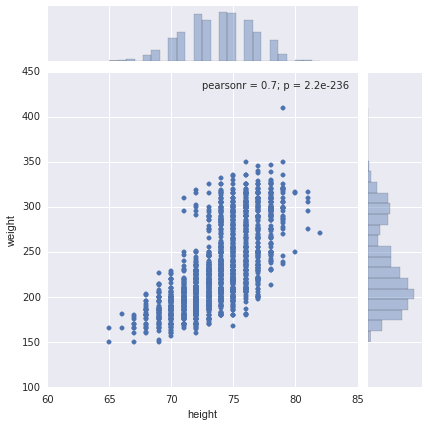

In [220]:
seaborn.jointplot(x='height', 
               y='weight',
               data = athlete_dfrm)

In [221]:
positions = ['QB', 'WR', 'RB', 'K', 'DL']

'postion: QB'

'postion: WR'

'postion: RB'

'postion: K'

'postion: DL'

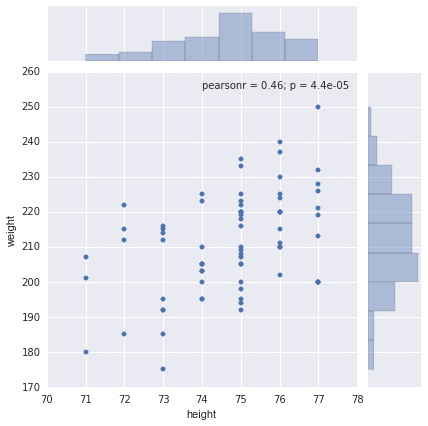

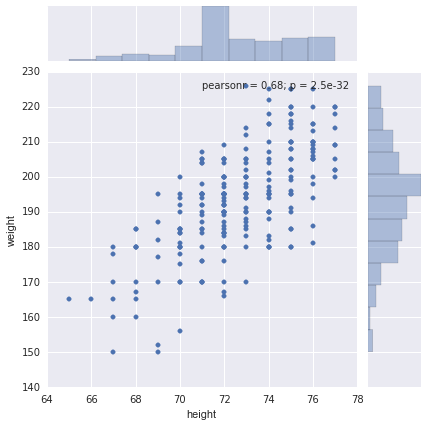

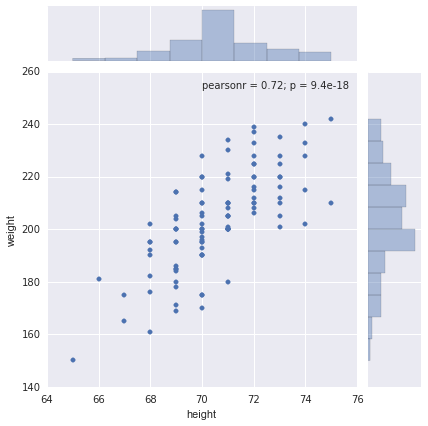

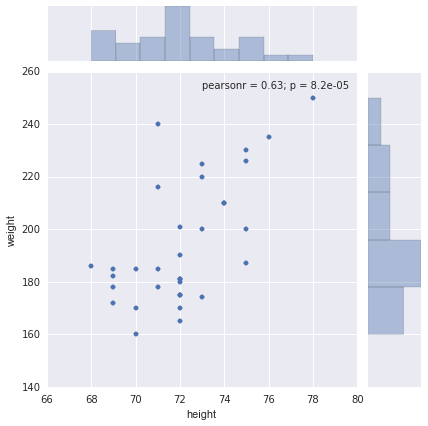

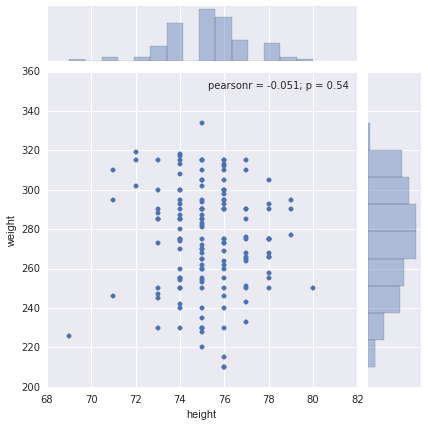

In [222]:
for position in positions:
    display("postion: " + position)
    quarterback_indices = (athlete_dfrm.position == position)
    quarterback_dfrm = athlete_dfrm[quarterback_indices]
    seaborn.jointplot(x='height', 
                   y='weight',
                   data = quarterback_dfrm)

In [227]:
heights = athlete_dfrm.height.tolist()
weights = athlete_dfrm.weight.tolist()
positions = athlete_dfrm.position.tolist()
height_position = zip(heights, positions)

First, lets try to fit height vs weight

In [239]:
ols_fitter = linear_model.LinearRegression()
training_vector = [[h] for h in heights]
ols_fitter.fit(training_vector, weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
ols_fitter.coef_

array([ 11.67103943])

TypeError: score() takes at least 3 arguments (1 given)